In [1]:
import pandas as pd
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

In [2]:
data_dir = "..\\..\\DATA\\HAM10000_images_part_1_and_2"  # directory with all images

In [3]:
dest_dir = "..\\..\\DATA\\recognized\\"  # directory where all images will be divided into subdirectories

In [4]:
df = pd.read_csv("..\\..\\DATA\\HAM10000_metadata")  # read metadata

In [5]:
df = df.rename(columns={"dx": "diagnosis"})
df = df[["image_id", "diagnosis"]]

In [6]:
train_dir = os.path.join(dest_dir, "train")  # create train directory
test_dir = os.path.join(dest_dir, "test")  # create test directory
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [7]:
train_df, test_df = train_test_split(
    df, test_size=0.2, stratify=df["diagnosis"], random_state=42
)  # split images into test and train directories

In [84]:
for index, row in train_df.iterrows():
    source_file = os.path.join(data_dir, row["image_id"] + ".jpg")
    destination_file = os.path.join(
        train_dir, row["diagnosis"], f"{row['image_id']}.jpg"
    )
    os.makedirs(os.path.dirname(destination_file), exist_ok=True)
    shutil.copyfile(source_file, destination_file)  # create subdirectories for each label inside train directory

In [85]:
for index, row in test_df.iterrows():
    source_file = os.path.join(data_dir, row["image_id"] + ".jpg")
    destination_file = os.path.join(
        test_dir, row["diagnosis"], f"{row['image_id']}.jpg"
    )
    os.makedirs(os.path.dirname(destination_file), exist_ok=True)
    shutil.copyfile(source_file, destination_file)  # create subdirectories for each label inside test directory

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="reflect",
)  # define train image generator, add data augmentation techniques

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255.)  # define test image generator

In [10]:
train_data = train_datagen.flow_from_directory(
    directory=train_dir, class_mode="categorical", batch_size=32, target_size=(256, 256)
)  # load train data

Found 8012 images belonging to 7 classes.


In [12]:
test_data = test_datagen.flow_from_directory(
    directory=test_dir, class_mode="categorical", batch_size=32, target_size=(256, 256), shuffle=False
)  # load test_data

Found 2003 images belonging to 7 classes.


In [13]:
tf.random.set_seed(42)
model_1 = Sequential(
    [Conv2D(filters=10,
            kernel_size=3,
            activation="relu",
            input_shape=(256, 256, 3)),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(pool_size=2, padding="valid"),
     Conv2D(10,3,activation="relu"),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(2),
     Flatten(),
     Dense(7, activation="softmax")
     ]
)

C:\Users\natal\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
model_1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history_1 = model_1.fit(train_data, epochs=5,
                        validation_data = test_data)

Epoch 1/5


C:\Users\natal\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 203s 783ms/step - accuracy: 0.6409 - loss: 1.1392 - val_accuracy: 0.6700 - val_loss: 0.9907
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 188s 733ms/step - accuracy: 0.6692 - loss: 0.9481 - val_accuracy: 0.6650 - val_loss: 0.9392
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 188s 737ms/step - accuracy: 0.6710 - loss: 0.9081 - val_accuracy: 0.6705 - val_loss: 0.9265
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 192s 750ms/step - accuracy: 0.6719 - loss: 0.8877 - val_accuracy: 0.6785 - val_loss: 0.8941
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 188s 735ms/step - accuracy: 0.6669 - loss: 0.9006 - val_accuracy: 0.6755 - val_loss: 0.8859


In [17]:
def plot_loss_curves(history):
  """
  Returns separate loss and accuracy curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

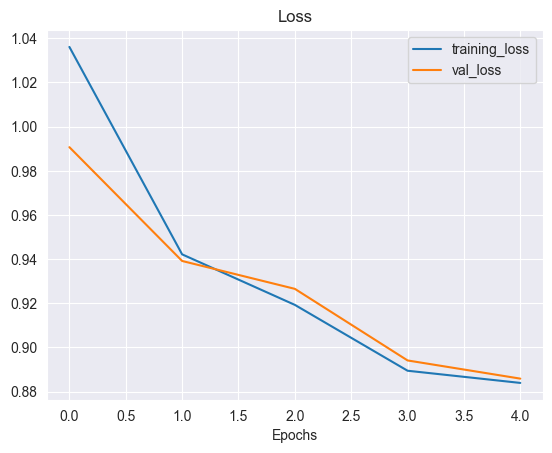

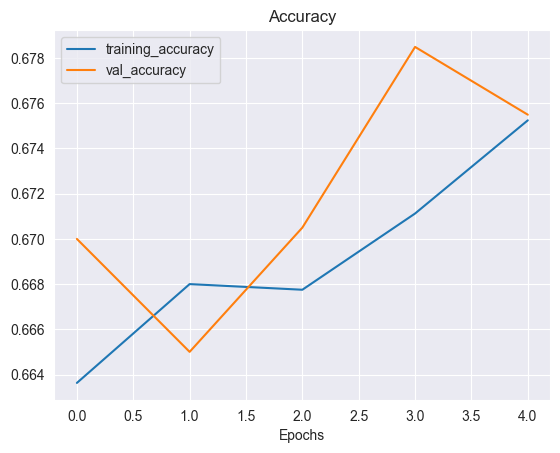

In [18]:
plot_loss_curves(history_1)

Extremely high accuracy at the beginning -> issue connected with imbalanced dataset

63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step


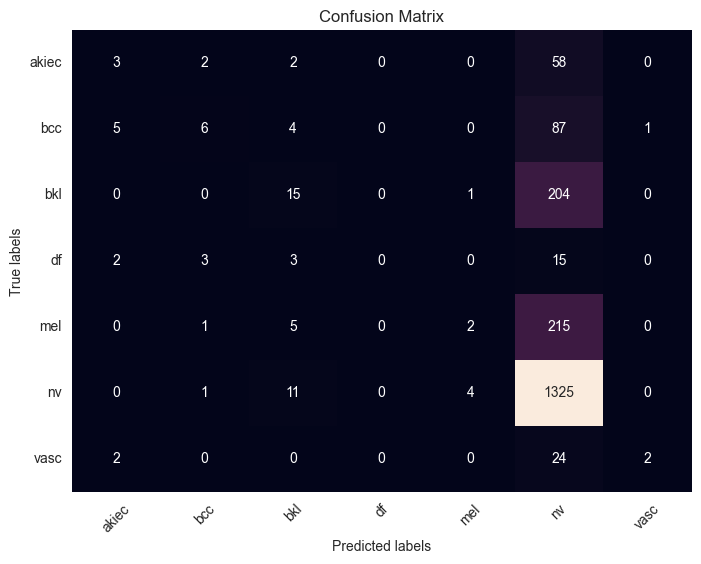

In [19]:
class_names = list(train_data.class_indices.keys())
# Generate predictions
y_predict = model_1.predict(test_data)
# Get true labels and class labels
y_true = test_data.classes

preds = np.argmax(y_predict, axis=1)

confusion_matrix = tf.math.confusion_matrix(y_true, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cbar=False)

# Set x-axis labels to class names
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=45, ha='center')
# Set y-axis labels to class names
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=0, va='center')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
print(classification_report(y_true, preds, target_names=class_names))

              precision    recall  f1-score   support

       akiec       0.25      0.05      0.08        65
         bcc       0.46      0.06      0.10       103
         bkl       0.38      0.07      0.12       220
          df       0.00      0.00      0.00        23
         mel       0.29      0.01      0.02       223
          nv       0.69      0.99      0.81      1341
        vasc       0.67      0.07      0.13        28

    accuracy                           0.68      2003
   macro avg       0.39      0.18      0.18      2003
weighted avg       0.57      0.68      0.57      2003


C:\Users\natal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\natal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\natal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [22]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes= np.unique(train_data.classes),
                                                 y=train_data.classes)  # compute class weights for each

In [23]:
class_weights_dict = dict(enumerate(class_weights))

In [24]:
model_2 = tf.keras.models.clone_model(model_1)  # clone model_1's architecture 

In [25]:
model_2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history_2 = model_2.fit(train_data, epochs=5,
                        validation_data = test_data,
                        class_weight=class_weights_dict)

Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 200s 775ms/step - accuracy: 0.2654 - loss: 2.1024 - val_accuracy: 0.3210 - val_loss: 1.7392
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 208s 816ms/step - accuracy: 0.3516 - loss: 1.7917 - val_accuracy: 0.4758 - val_loss: 1.4432
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 187s 725ms/step - accuracy: 0.2504 - loss: 1.7931 - val_accuracy: 0.4828 - val_loss: 1.4951
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 187s 729ms/step - accuracy: 0.3426 - loss: 1.7708 - val_accuracy: 0.1323 - val_loss: 1.8253
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 185s 722ms/step - accuracy: 0.3054 - loss: 1.8111 - val_accuracy: 0.1518 - val_loss: 1.8498


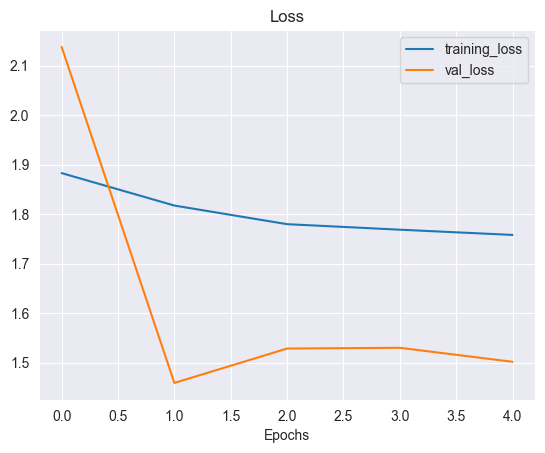

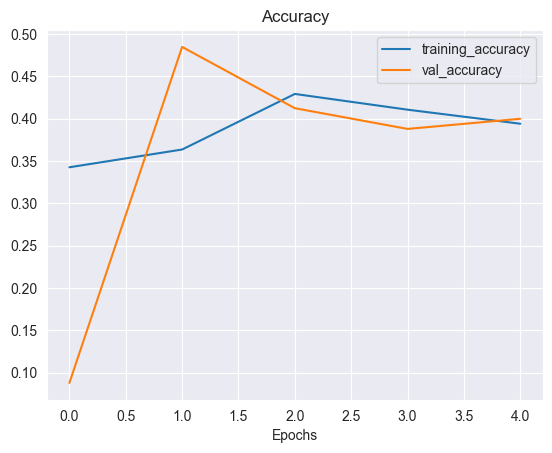

In [103]:
plot_loss_curves(history_2)

63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 247ms/step


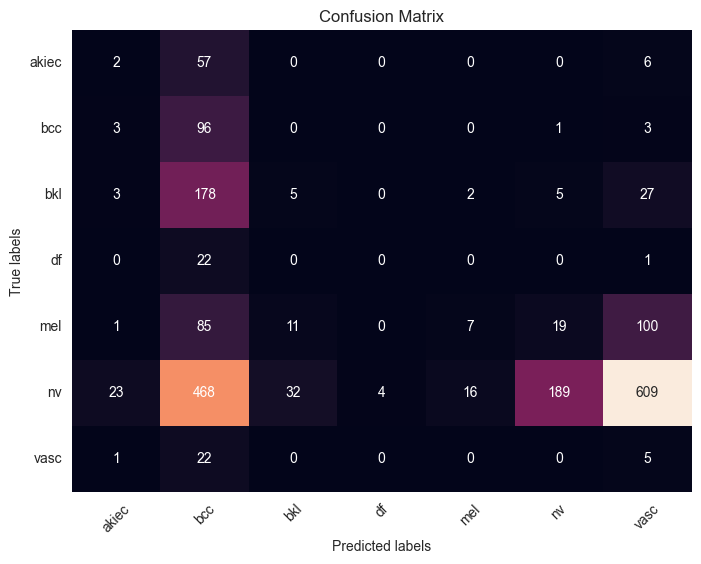

In [27]:
class_names = list(train_data.class_indices.keys())
# Generate predictions
y_predict = model_2.predict(test_data)
# Get true labels and class labels
y_true = test_data.classes

preds = np.argmax(y_predict, axis=1)

confusion_matrix = tf.math.confusion_matrix(y_true, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cbar=False)

# Set x-axis labels to class names
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=45, ha='center')
# Set y-axis labels to class names
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=0, va='center')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
print(classification_report(y_true, preds, target_names=class_names))

              precision    recall  f1-score   support

       akiec       0.06      0.03      0.04        65
         bcc       0.10      0.93      0.19       103
         bkl       0.10      0.02      0.04       220
          df       0.00      0.00      0.00        23
         mel       0.28      0.03      0.06       223
          nv       0.88      0.14      0.24      1341
        vasc       0.01      0.18      0.01        28

    accuracy                           0.15      2003
   macro avg       0.21      0.19      0.08      2003
weighted avg       0.64      0.15      0.18      2003


low accuracy

In [14]:
class_names = list(train_data.class_indices.keys())

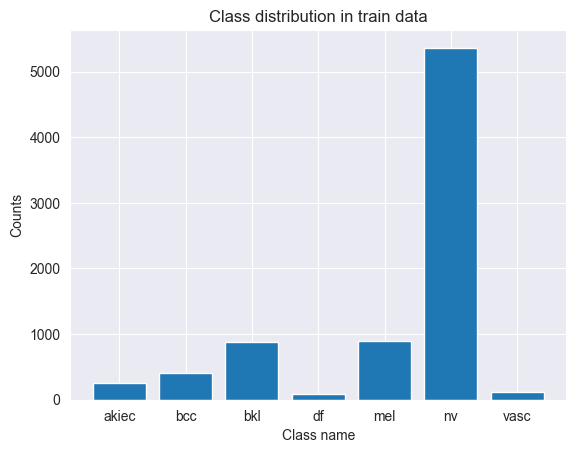

In [15]:
unique, counts = np.unique(np.array(list(train_data.classes)), return_counts=True)
plt.bar(x=class_names, height=counts, color="#660066")
plt.title("Class distribution in train data")
plt.xlabel("Class name")
plt.ylabel("Counts");

In [16]:
counts

array([ 262,  411,  879,   92,  890, 5364,  114], dtype=int64)

Next strategy -> Balance dataset